In [1]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import matplotlib.pyplot as plt
full_data = nfl.import_pbp_data([2017, 2018, 2019, 2020, 2021], downcast=True, cache=False, alt_path=None)

2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
Downcasting floats.


/Users/nicksmith/opt/anaconda3/envs/NFL/lib/python3.10/site-packages/nfl_data_py/__init__.py:137: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plays.loc[:, cols] = plays.loc[:, cols].astype(numpy.float32)


In [13]:
newData = full_data[['game_date', 'play_id', 'play_type_nfl', 'game_id', 'possession_team', 'home_team', 'away_team', 'total_home_score', 'total_away_score', 'home_score', 'away_score', 'wp', 'game_half', 'game_seconds_remaining', 'play_type', 'def_wp', 'punt_blocked', 'third_down_converted', 'third_down_failed', 'fourth_down_converted', 'fourth_down_failed', 'interception', 'punt_inside_twenty', 'kickoff_inside_twenty', 'kickoff_out_of_bounds', 'fumble_forced', 'fumble_not_forced', 'fumble_lost', 'fumble', 'safety', 'own_kickoff_recovery_td', 'qb_hit', 'sack', 'touchdown', 'pass_touchdown', 'rush_touchdown', 'return_touchdown', 'drive_ended_with_score']]
newData = newData.rename(columns={"wp": "win_percentage", "def_wp": "defense_win_percentage"})
newData

,game_date,play_id,play_type_nfl,game_id,possession_team,home_team,away_team,total_home_score,total_away_score,home_score,...,fumble,safety,own_kickoff_recovery_td,qb_hit,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,drive_ended_with_score
0,2017-09-10,1.0,GAME_START,2017_01_ARI_DET,,DET,ARI,0.0,0.0,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-09-10,37.0,KICK_OFF,2017_01_ARI_DET,DET,DET,ARI,0.0,0.0,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-09-10,73.0,PASS,2017_01_ARI_DET,ARI,DET,ARI,0.0,0.0,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-09-10,97.0,RUSH,2017_01_ARI_DET,ARI,DET,ARI,0.0,0.0,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-09-10,118.0,PASS,2017_01_ARI_DET,ARI,DET,ARI,0.0,0.0,35,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243126,2022-02-13,3930.0,RUSH,2021_22_LA_CIN,CIN,CIN,LA,20.0,23.0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243127,2022-02-13,3951.0,TIMEOUT,2021_22_LA_CIN,,CIN,LA,20.0,23.0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243128,2022-02-13,3968.0,PASS,2021_22_LA_CIN,CIN,CIN,LA,20.0,23.0,20,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
243129,2022-02-13,3990.0,RUSH,2021_22_LA_CIN,LA,CIN,LA,20.0,23.0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#temp = newData[['game_id', 'punt_blocked']]
puntData = newData[newData["punt_blocked"] == 1.0]
pd.set_option('display.max_rows', None)
puntData

NameError: name 'newData' is not defined

In [40]:
puntData.to_csv("punt.csv")

In [45]:
updated_data = pd.read_csv("Punt_Block_Research - Sheet1 (1).csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
updated_data

,Date of Game,Game ID,Team that was blocked,Home Team,Home Score,Away Score,Home Final Score,Away Final Score,Half,location of block,return yards,score off return,Score on resulting drive,# of plays on resulting drive,yards on resulting drive,points scored off block/resulting drive,Blocking_team_won,score differential after block (Blocking - Blocked),Points scored by blocking team after block,points scored by team that was blocked after block,Blocking Team was winning,Blocking team won
0,2017-09-10,2017_01_PIT_CLE,CLE,CLE,0,6,18,21,Half1,-16,0,1,NaN,0,0,6,1,-3,15,18,1,1
1,2017-10-15,2017_06_LA_JAX,JAX,JAX,14,23,17,27,Half1,-19,8,1,NaN,0,0,6,0,1,4,3,1,1
2,2017-10-29,2017_08_IND_CIN,IND,CIN,0,0,24,23,Half1,47,0,0,1.0,9,38,3,1,1,24,23,0,1
3,11/5/17,2017_09_LA_NYG,NYG,NYG,10,41,17,51,Half2,-34,0,0,1.0,3,18,6,1,3,10,7,1,1
4,11/5/17,2017_09_TB_NO,TB,NO,9,0,30,10,Half1,-28,7,1,NaN,0,0,6,1,11,21,10,1,1
5,11/12/17,2017_10_NE_DEN,DEN,DEN,6,17,16,41,Half1,-41,0,0,1.0,5,20,3,1,14,24,10,1,1
6,11/19/17,2017_11_CIN_DEN,CIN,DEN,0,0,17,20,Half1,-34,0,0,0.0,6,25,0,0,-3,17,20,0,0
7,12/3/17,2017_13_DEN_MIA,DEN,MIA,19,3,35,9,Half2,-36,0,0,0.0,2,24,0,1,10,16,6,1,1
8,12/10/17,2017_14_PHI_LA,PHI,LA,27,24,35,43,Half2,-30,16,1,NaN,0,0,6,0,-11,8,19,1,0
9,12/17/17,2017_15_PHI_NYG,NYG,NYG,20,14,29,34,Half1,-29,0,0,1.0,3,18,6,1,-11,9,20,0,1


In [46]:
mean_points_scored = updated_data["points scored off block/resulting drive"].mean()
print("avg points scored off block/resulting drive: ", mean_points_scored)

avg points scored off block/resulting drive:  4.7727272727272725


In [47]:
score_dict = updated_data["points scored off block/resulting drive"].value_counts()
score_dict

6    47
3     9
0     7
2     3
Name: points scored off block/resulting drive, dtype: int64

In [48]:
mylabels = ["Touchdown", "Field Goal", "No score", "Safety"]
#plt.pie(score_dict, labels = mylabels, autopct='%1.2f%%')
#plt.title('Type of Score after a blocked punt/resulting drive in the past 5 NFL seasons')


In [49]:
punt_not_returned = updated_data[updated_data["score off return"] != 1]
punt_not_returned

,Date of Game,Game ID,Team that was blocked,Home Team,Home Score,Away Score,Home Final Score,Away Final Score,Half,location of block,return yards,score off return,Score on resulting drive,# of plays on resulting drive,yards on resulting drive,points scored off block/resulting drive,Blocking_team_won,score differential after block (Blocking - Blocked),Points scored by blocking team after block,points scored by team that was blocked after block,Blocking Team was winning,Blocking team won
2,2017-10-29,2017_08_IND_CIN,IND,CIN,0,0,24,23,Half1,47,0,0,1.0,9,38,3,1,1,24,23,0,1
3,11/5/17,2017_09_LA_NYG,NYG,NYG,10,41,17,51,Half2,-34,0,0,1.0,3,18,6,1,3,10,7,1,1
5,11/12/17,2017_10_NE_DEN,DEN,DEN,6,17,16,41,Half1,-41,0,0,1.0,5,20,3,1,14,24,10,1,1
6,11/19/17,2017_11_CIN_DEN,CIN,DEN,0,0,17,20,Half1,-34,0,0,0.0,6,25,0,0,-3,17,20,0,0
7,12/3/17,2017_13_DEN_MIA,DEN,MIA,19,3,35,9,Half2,-36,0,0,0.0,2,24,0,1,10,16,6,1,1
9,12/17/17,2017_15_PHI_NYG,NYG,NYG,20,14,29,34,Half1,-29,0,0,1.0,3,18,6,1,-11,9,20,0,1
10,12/23/17,2017_16_IND_BAL,BAL,BAL,23,16,23,16,Half2,-41,0,0,0.0,6,10,0,0,0,0,0,0,0
12,9/23/18,2018_03_DEN_BAL,BAL,BAL,0,0,27,14,Half1,-13,2,0,1.0,1,6,6,0,-13,14,27,0,0
14,9/23/18,2018_03_NO_ATL,ATL,ATL,21,16,37,43,Half2,-44,12,0,1.0,4,16,6,1,11,27,16,0,1
15,9/30/18,2018_04_CIN_ATL,CIN,ATL,24,28,36,37,Half2,-19,0,0,1.0,4,-2,3,0,3,12,9,0,0


In [50]:
score_dict = punt_not_returned["points scored off block/resulting drive"].value_counts()
score_dict

6    23
3     9
0     7
Name: points scored off block/resulting drive, dtype: int64

In [51]:
mylabels = ["Touchdown", "Field Goal", "No score"]
#plt.pie(score_dict, labels = mylabels, autopct='%1.2f%%')
#plt.title('Type of Score on resulting drive in the past 5 NFL seasons excluding points scored on the return')

In [52]:
winning_dict = updated_data["Blocking Team was winning"].value_counts()
winning_dict

0    36
1    30
Name: Blocking Team was winning, dtype: int64

In [55]:
updated_data_blocking_team_winning = updated_data[updated_data["Blocking Team was winning"] == 1]
winning_dict = updated_data_blocking_team_winning["Blocking team won"].value_counts()
#winning_dict
updated_data_blocking_team_winning

,Date of Game,Game ID,Team that was blocked,Home Team,Home Score,Away Score,Home Final Score,Away Final Score,Half,location of block,return yards,score off return,Score on resulting drive,# of plays on resulting drive,yards on resulting drive,points scored off block/resulting drive,Blocking_team_won,score differential after block (Blocking - Blocked),Points scored by blocking team after block,points scored by team that was blocked after block,Blocking Team was winning,Blocking team won
0,2017-09-10,2017_01_PIT_CLE,CLE,CLE,0,6,18,21,Half1,-16,0,1,NaN,0,0,6,1,-3,15,18,1,1
1,2017-10-15,2017_06_LA_JAX,JAX,JAX,14,23,17,27,Half1,-19,8,1,NaN,0,0,6,0,1,4,3,1,1
3,11/5/17,2017_09_LA_NYG,NYG,NYG,10,41,17,51,Half2,-34,0,0,1.0,3,18,6,1,3,10,7,1,1
4,11/5/17,2017_09_TB_NO,TB,NO,9,0,30,10,Half1,-28,7,1,NaN,0,0,6,1,11,21,10,1,1
5,11/12/17,2017_10_NE_DEN,DEN,DEN,6,17,16,41,Half1,-41,0,0,1.0,5,20,3,1,14,24,10,1,1
7,12/3/17,2017_13_DEN_MIA,DEN,MIA,19,3,35,9,Half2,-36,0,0,0.0,2,24,0,1,10,16,6,1,1
8,12/10/17,2017_14_PHI_LA,PHI,LA,27,24,35,43,Half2,-30,16,1,NaN,0,0,6,0,-11,8,19,1,0
11,9/16/18,2018_02_MIN_GB,MIN,GB,6,0,29,29,Half1,-15,0,1,NaN,0,0,6,0,-6,23,29,1,0
13,9/23/18,2018_03_LAC_LA,LAC,LA,20,6,35,23,Half1,-4,0,1,NaN,0,0,6,1,-2,15,17,1,1
16,10/7/18,2018_05_ATL_PIT,ATL,PIT,20,10,41,17,Half2,-22,0,0,1.0,3,18,6,1,14,21,7,1,1


In [54]:
updated_data_blocking_team_losing = updated_data[updated_data["Blocking Team was winning"] == 0]
winning_dict = updated_data_blocking_team_losing["Blocking team won"].value_counts()
winning_dict

0    21
1    15
Name: Blocking team won, dtype: int64

In [60]:
score_labels = ["Team that blocked the punt", "Team that was blocked"] 
scores_after_block_block_winning = []
scores_after_block_block_losing = []
scores_after_block_block_winning.append(updated_data_blocking_team_winning["Points scored by blocking team after block"].mean())
scores_after_block_block_winning.append(updated_data_blocking_team_winning["points scored by team that was blocked after block"].mean())
scores_after_block_block_losing.append(updated_data_blocking_team_losing["Points scored by blocking team after block"].mean())
scores_after_block_block_losing.append(updated_data_blocking_team_losing["points scored by team that was blocked after block"].mean())
scores_after_block_block_losing

[16.36111111111111, 12.972222222222221]

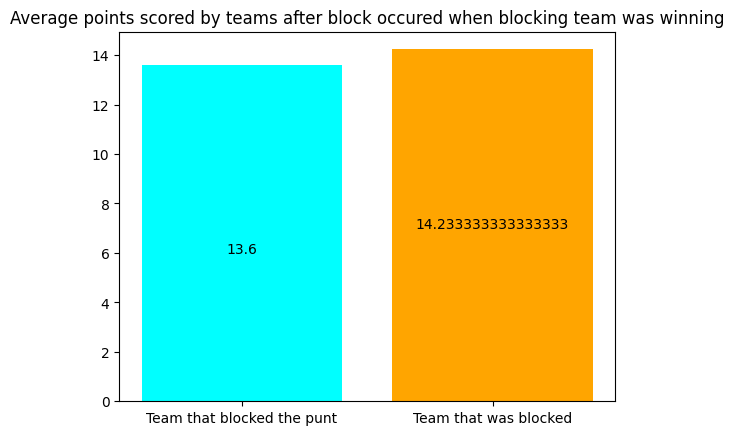

In [74]:
plt.bar(score_labels, scores_after_block_block_winning, color = ["cyan", "orange"])
plt.title("Average points scored by teams after block occured when blocking team was winning")
x = score_labels
y = scores_after_block_block_winning
for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

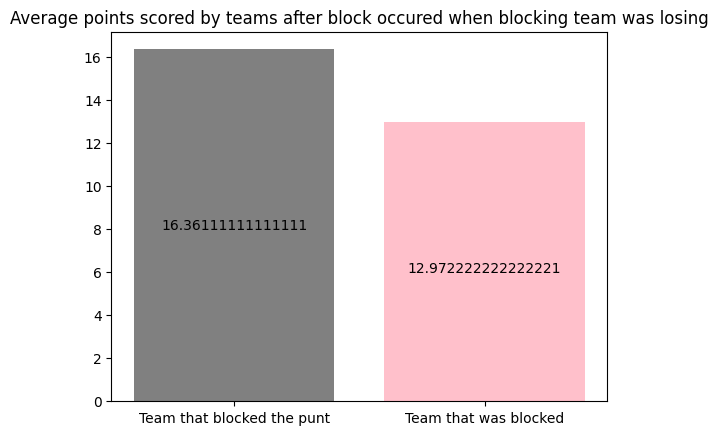

In [79]:
plt.bar(score_labels, scores_after_block_block_losing, color = ["gray", "pink"])
plt.title("Average points scored by teams after block occured when blocking team was losing")
x = score_labels
y = scores_after_block_block_losing
for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')